# Targeting Current Customers
## Application: Superstore targeting its existing customers 
Imagine a popular superstore getting ready for a big year-end sale. They are introducing a special offer called Gold Membership, which gives existing customers a fantastic 20% discount on everything. To make this offer known, the store wants to predict who might be interested. They believe that if they understand what factors influence a customer's decision, they can save on advertising costs. Your job is to look at the data they have and create a model that guesses the chance of a customer saying "yes" in the future.

#### Learning Outcomes

+ Data cleaning
+ Exploratory data analysis
+ Feature preprocessing
+ Logistic regression and Support vector machine

## Importing the required libraries

In [2]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')
%matplotlib inline

If you get error above, please install the libraries. You may uncomment the code below.

In [3]:
# If using pip
# !pip install pandas numpy matplotlib seaborn scikit-learn

# If using pip3:
# !pip3 install pandas numpy matplotlib seaborn scikit-learn

## Loading Dataset

<span style="color: blue;">Question:</span> Download the data <code>superstore_data.csv</code> from Canvas and read the CSV file using the Pandas library.   

In [4]:
superstore = pd.read_csv("./superstore_data.csv")

Let's examine the shape of the loaded dataset to understand its dimensions.

<span style="color: blue;">Question:</span> Display the shape of the <code>super_store</code> dataset.

In [5]:
superstore.shape

(2240, 22)

Let's gather more information about the dataset, such as data types and non-null values.

<span style="color: blue;">Question:</span> Display information about the <code>super_store</code> dataset using the <code>info()</code> function.


In [6]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Let's take a look at the initial records in the dataset to understand its structure.

<span style="color: blue;">Question:</span> Display the first few records of the <code>super_store</code> dataset?

In [7]:
superstore.head(n = 10)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0
5,7348,1958,PhD,Single,71691.0,0,0,3/17/2014,0,336,...,240,32,43,1,4,7,5,2,1,0
6,4073,1954,2n Cycle,Married,63564.0,0,0,1/29/2014,0,769,...,15,34,65,1,10,10,7,6,1,0
7,1991,1967,Graduation,Together,44931.0,0,1,1/18/2014,0,78,...,0,0,7,1,2,1,3,5,0,0
8,4047,1954,PhD,Married,65324.0,0,1,11/1/2014,0,384,...,21,32,5,3,6,2,9,4,0,0
9,9477,1954,PhD,Married,65324.0,0,1,11/1/2014,0,384,...,21,32,5,3,6,2,9,4,0,0


## Data Cleaning

#### <span style="color: blue;">Below we will go over some of the basic steps of data cleaning. Please note that you can certainly improve upon these steps. Additionally, by employing different cleaning and transformation techniques, you may obtain slightly different results. However, the overarching insight you derive should remain relatively the same.</span>

During the Data Cleaning step, let's examine the columns with missing values in the dataset and their respective counts.

<span style="color: blue;">Question:</span> Generate a list of columns with missing values in the <code>super_store</code> dataset, along with their respective counts, sorted in descending order.


In [8]:
superstore.isnull().sum().sort_values(ascending=False).loc[lambda x: x > 0]

Income    24
dtype: int64

💡 Only Income columns has some missing values (24 rows). Notice that we CANNOT drop the income column, because this can be an important source of information in predicting whether a consumer chooses to participate in the promotion.

Should we remove rows corresponding to missing income values, instead?

<span style="color: blue;">Question:</span> Remove the rows in the <code>super_store</code> dataset where the Income is missing. 


In [9]:
superstore = superstore.dropna()

Dt_customer and Id columns are primarily designed for referencing rows and don't significantly contribute to the variability of the data.

<span style="color: blue;">Question:</span> Remove Dt_customer and Id.

In [10]:
superstore = superstore.drop(["Dt_Customer", "Id"], 1)

<span style="color: blue;">Outlier Analysis:</span> What does outliers mean in this case? Should we remove them?

<span style="color: blue;">Question:</span> Identify and remove outliers in <code>super_store</code> and save it to <code>super_store_cleaned</code>. Also, check the number of remaining observations after outlier analysis.


In [11]:
num_cols = superstore.select_dtypes(include=["int", "float"]).columns.to_list()
def drop_outliers(x):
    for col in num_cols:
      Q1 = x[col].quantile(.25)
      Q3 = x[col].quantile(.75)
      IQR = Q3 - Q1
      x = x[(x[col] >= Q1 - 1.5*IQR) & (x[col] <= Q3 + 1.5*IQR)]
    return x

superstore_clean = drop_outliers(superstore)

Let's check variance of columns

<span style="color: blue;">Question:</span> Identify and remove columns from the <code>super_store</code> dataset which have poor variance.


In [12]:
superstore[num_cols].var()

Year_Birth             1.436535e+02
Income                 6.336838e+08
Kidhome                2.882576e-01
Teenhome               2.961332e-01
Recency                8.380071e+02
MntWines               1.137901e+05
MntFruits              1.583556e+03
MntMeatProducts        5.030299e+04
MntFishProducts        2.997791e+03
MntSweetProducts       1.686913e+03
MntGoldProds           2.684837e+03
NumDealsPurchases      3.700682e+00
NumWebPurchases        7.512813e+00
NumCatalogPurchases    8.565770e+00
NumStorePurchases      1.056760e+01
NumWebVisitsMonth      5.882364e+00
Response               1.277471e-01
Complain               9.390967e-03
dtype: float64

In [13]:
cat_columns = superstore.select_dtypes(["object"]).columns.to_list()
for c in cat_columns:
    print(c)
    print(superstore_clean[c].value_counts())

Education
Graduation    426
PhD           166
Master        143
2n Cycle       92
Basic          47
Name: Education, dtype: int64
Marital_Status
Married     349
Together    231
Single      183
Divorced     90
Widow        20
Alone         1
Name: Marital_Status, dtype: int64




<span style="color: blue;">Question:</span> Drop the columns with zero variance from <code>super_store</code> dataset.

In [14]:
superstore_clean

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
2,1958,Graduation,Married,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1967,Graduation,Together,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0
7,1967,Graduation,Together,44931.0,0,1,0,78,0,11,0,0,7,1,2,1,3,5,0,0
13,1981,Graduation,Married,26872.0,0,0,0,3,10,8,3,16,32,1,1,1,2,6,0,0
15,1977,Graduation,Married,54809.0,1,1,0,63,6,57,13,13,22,4,2,1,5,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,1974,2n Cycle,Married,20130.0,0,0,99,0,6,3,7,6,12,1,1,0,3,8,0,0
2231,1973,Graduation,Widow,42429.0,0,1,99,55,0,6,2,0,4,2,1,1,3,5,0,0
2232,1973,Graduation,Widow,42429.0,0,1,99,55,0,6,2,0,4,2,1,1,3,5,0,0
2236,1977,2n Cycle,Married,31056.0,1,0,99,5,10,13,3,8,16,1,1,0,3,8,0,0


## Exploratory data analysis and Preprocessing features

Let's start the Exploratory Data Analysis by examining the cleaned dataset.

<span style="color: blue;">Question:</span> Display the shape of the cleaned <code>super_store</code> dataset and obtain information about its columns, data types, and non-null counts
   


For preprocessing categorical variables, we have two options: 
- map the categorical variables to numeric variables or
- convert them to indicator/dummy variables
    
#### <span style="color: blue;">Notice that it requires domain expertise to do this efficiently. Below, we will go over some of the basic steps like mapping and conversion to dummy variables. Please note that you can certainly improve upon these steps and create more variables by combining the existing ones. </span>

Let's find out the categorical columns.

<span style="color: blue;">Question:</span>  Display all categorical variables.

In [15]:
superstore.Education.unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [16]:
superstore["Education"] = superstore.Education.map({'Basic': 0, 'Graduation': 1, '2n Cycle': 2, 'Master': 3, 'PhD': 4})

In [17]:
dummy_col = pd.get_dummies(superstore["Marital_Status"], drop_first = True)
superstore = pd.concat([superstore, dummy_col], axis=1)
superstore = superstore.drop(['Marital_Status'], axis=1)

💡 Converting categorical to numerical variables: 

Education can be ordered as follows: Basic: 0, Master: 1, 2n Cycle: 1, Graduation: 1, PhD: 2

<span style="color: blue;">Question:</span>  Map education as per the above scheme.

We can create dummy columns for Martial status and Year:

<span style="color: blue;">Question:</span>  Convert Martial status and Year to dummy column and add it back to the dataset.

Look into the converted columns:

<span style="color: blue;">Question:</span> Display the converted columns.

Let's visually assess the correlations between variables by creating a heatmap.

<span style="color: blue;">Question:</span> Generate a heatmap to visualize the correlation matrix among numerical variables in the cleaned <code>super_store</code> dataset.

In [18]:
correlation = superstore.select_dtypes(['int', 'float']).corr()
correlation.style.background_gradient(cmap="Greens").format("{:.2f}")

,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
Year_Birth,1.00,-0.15,-0.16,0.23,-0.35,-0.02,-0.16,-0.02,-0.03,-0.04,-0.02,-0.06,-0.06,-0.15,-0.12,-0.13,0.12,0.02,-0.03
Education,-0.15,1.00,0.10,-0.04,0.11,-0.02,0.17,-0.10,0.00,-0.11,-0.10,-0.12,0.03,0.07,0.05,0.06,-0.03,0.09,-0.04
Income,-0.16,0.10,1.00,-0.43,0.02,-0.00,0.58,0.43,0.58,0.44,0.44,0.33,-0.08,0.39,0.59,0.53,-0.55,0.13,-0.03
Kidhome,0.23,-0.04,-0.43,1.00,-0.04,0.01,-0.50,-0.37,-0.44,-0.39,-0.38,-0.36,0.22,-0.37,-0.50,-0.50,0.45,-0.08,0.04
Teenhome,-0.35,0.11,0.02,-0.04,1.00,0.01,0.00,-0.18,-0.26,-0.21,-0.16,-0.02,0.39,0.16,-0.11,0.05,0.13,-0.15,0.00
Recency,-0.02,-0.02,-0.00,0.01,0.01,1.00,0.02,-0.01,0.02,0.00,0.03,0.02,0.00,-0.01,0.02,-0.00,-0.02,-0.20,0.01
MntWines,-0.16,0.17,0.58,-0.50,0.00,0.02,1.00,0.39,0.57,0.40,0.39,0.39,0.01,0.55,0.63,0.64,-0.32,0.25,-0.04
MntFruits,-0.02,-0.10,0.43,-0.37,-0.18,-0.01,0.39,1.00,0.55,0.59,0.57,0.40,-0.13,0.30,0.49,0.46,-0.42,0.12,-0.01
MntMeatProducts,-0.03,0.00,0.58,-0.44,-0.26,0.02,0.57,0.55,1.00,0.57,0.54,0.36,-0.12,0.31,0.73,0.49,-0.54,0.24,-0.02
MntFishProducts,-0.04,-0.11,0.44,-0.39,-0.21,0.00,0.40,0.59,0.57,1.00,0.58,0.43,-0.14,0.30,0.53,0.46,-0.45,0.11,-0.02


Let's plot distribution of responses across all columns to see if there is any insight here.

<span style="color: blue;">Question:</span>  Use box plot to plot distribution of Responses 0 and 1 across all numeric columns.

array([[<AxesSubplot:title={'center':'Alone'}, xlabel='[Response]'>,
        <AxesSubplot:title={'center':'Complain'}, xlabel='[Response]'>,
        <AxesSubplot:title={'center':'Divorced'}, xlabel='[Response]'>,
        <AxesSubplot:title={'center':'Education'}, xlabel='[Response]'>,
        <AxesSubplot:title={'center':'Income'}, xlabel='[Response]'>],
       [<AxesSubplot:title={'center':'Kidhome'}, xlabel='[Response]'>,
        <AxesSubplot:title={'center':'Married'}, xlabel='[Response]'>,
        <AxesSubplot:title={'center':'MntFishProducts'}, xlabel='[Response]'>,
        <AxesSubplot:title={'center':'MntFruits'}, xlabel='[Response]'>,
        <AxesSubplot:title={'center':'MntGoldProds'}, xlabel='[Response]'>],
       [<AxesSubplot:title={'center':'MntMeatProducts'}, xlabel='[Response]'>,
        <AxesSubplot:title={'center':'MntSweetProducts'}, xlabel='[Response]'>,
        <AxesSubplot:title={'center':'MntWines'}, xlabel='[Response]'>,
        <AxesSubplot:title={'center':'Num

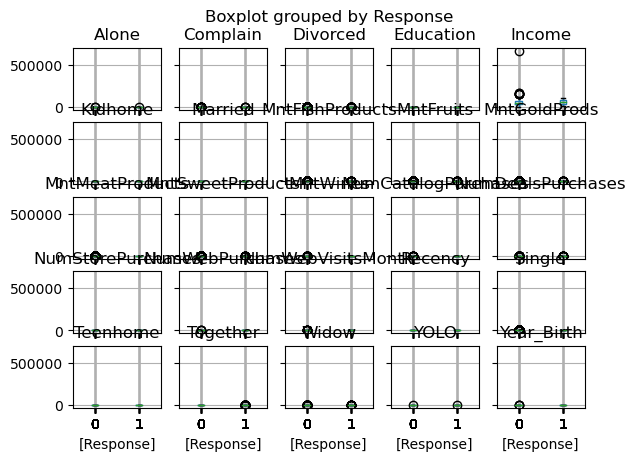

In [19]:
superstore.boxplot(by='Response')

To identify the variables that can play a crucial role, one can simply eyeball the box plots and identify the variables that have different distribution for class 0 and 1. For example: recency, education, Mntwines, have different distribution for class 1 and 0.

## Setting up train and test split
We'll split the dataset into feature and target variables.

<span style="color: blue;">Question:</span> Separate the target variable ('Response') from the <code>super_store</code> dataset and assign it to <code>y</code>. Assign the rest to <code>x</code>

In [20]:
y = superstore['Response']
x = superstore.drop('Response', axis=1)

Now, let's split our data for training models. For this we will be using 'train_test_split' function in sklearn. This function will randomly choose a user specified portion of the data to be testing data, and the remaining as training data.

<span style="color: blue;">Question:</span>  Split data with ratio as 80:20.

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8)

## Modelling

We build logistic regression model available in sklearn.linear_model

<span style="color: blue;">Question:</span> Build a logistic regression model with <code>max_iter = 500</code>

In [22]:
from sklearn.linear_model import LogisticRegression

lrm = LogisticRegression(max_iter=500).fit(x_train, y_train)

Let us compute the score on train data

<span style="color: blue;">Question:</span>Use score function on train data</code>

In [23]:
lrm.score(x_train, y_train)

0.8521444695259593

Let us compute the score on test data.

<span style="color: blue;">Question:</span>Use score function on test data</code>

In [24]:
lrm.score(x_test, y_test)

0.8716216216216216

<span style="color: blue;">Question:</span> Get the classification report. Which class is more important? Is the model performing well on this class?


In [29]:
from sklearn.metrics import classification_report

y_pred = lrm.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       383
           1       0.55      0.34      0.42        61

    accuracy                           0.87       444
   macro avg       0.73      0.65      0.68       444
weighted avg       0.85      0.87      0.86       444



<span style="color: blue;">Question:</span> Predict probabilities using the model

In [26]:
probs = lrm.predict_proba(x_test)

In a typical case of targeting problems, response rates are low, much lower than 0.50, so a 50 percent cut-off, used by default in ML algorithms, would perform poorly on the 'response' class. In fact, if data analysts were to use a 50 percent cut-off, they would predict that majority of customers would respond no, and the company would target quite a little of them. One way to tackle this is to have a threshold much lower than 0.5. Two methods are prominently used to obtain the optimal threshold: Lift and Youden's index. 



<span style="color: blue;">Question:</span> Calculate Lift values by deciles (ordered by highest to lowest of the probability to respond)

In [30]:
prob_0 = probs[:,0]
for l in np.arange(0, 1, 0.1):
    y_pred = np.zeros(len(prob_0), dtype='int')
    y_pred[prob_0 > l] = 1
    y_pred[prob_0 <= l] = 0
    lift = (y_pred & y_test).mean() / (y_test.mean() * y_pred.mean())
    print(f"Lift value for thres={l} is: {lift}")

Lift value for thres=0.0 is: 1.0
Lift value for thres=0.1 is: 0.9858268882063426
Lift value for thres=0.2 is: 0.9572878331660533
Lift value for thres=0.30000000000000004 is: 0.9348774251767182
Lift value for thres=0.4 is: 0.8049373191899711
Lift value for thres=0.5 is: 0.7171121699103609
Lift value for thres=0.6000000000000001 is: 0.6345523329129885
Lift value for thres=0.7000000000000001 is: 0.5674246430460074
Lift value for thres=0.8 is: 0.3994402239104358
Lift value for thres=0.9 is: 0.38141599255494313


In [62]:
y_pred

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,

<span style="color: blue;">Question:</span> Use the probability value corresponding to the lift value of 2 to conduct classification and report the classification metrics.

16

As discussed above, another way is to obtain the threshold based on Youden's index from the ROC curve.

<span style="color: blue;">Question:</span> Calculate Youden's index 

<span style="color: blue;">Question:</span> Use the threshold based on Youden's index and obtain classification report.

Now build the SVM model with linear kernel, get the accuracy score for training and test data, and classification report for the test data.

<span style="color: blue;">Question:</span> Build a SVM model with <code>kernel = linear</code>.

<span style="color: blue;">Question:</span> Calcualte threshold again based on the lift value. 

<span style="color: blue;">Question:</span> Use the threshold based on Youden's index and obtain classification report again.

Let us now use a more complex model: SVM with RBF kernel.

<span style="color: blue;">Question:</span> Build a SVM model with <code>kernel = rbf</code>, <code>gamma = 0.001</code> and <code>C = 1.0</code>.

<span style="color: blue;">Question:</span> Calcualte threshold again based on the lift value

<span style="color: blue;">Question:</span> Use the threshold based on Youden's index and obtain classification report again.

<span style="color: blue;">Question:</span> Compare model performances of Logistic Regression, SVM with linear kernel and SVM with RBF kernel on train and test data and comment on their generalizability

<span style="color: blue;">Question:</span> Compare performances of all the above models across different thresholds and what do you think is a better way of obtaining the threshold for this context. 